In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
from glob import glob

In [11]:
path = 'abdominalCT/Abdominal CT_102029__0821022805/*.dcm'

In [3]:
# load the DICOM files
files = []
print('glob: {}'.format(sys.argv[1]))
for fname in glob(path, recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))



glob: -f
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00001.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00002.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00003.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00004.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00005.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00006.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00007.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00008.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00009.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00010.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00011.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00012.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\ser003img00013.dcm
loading: abdominalCT/Abdominal CT_102029__0821022805\se

In [4]:
# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

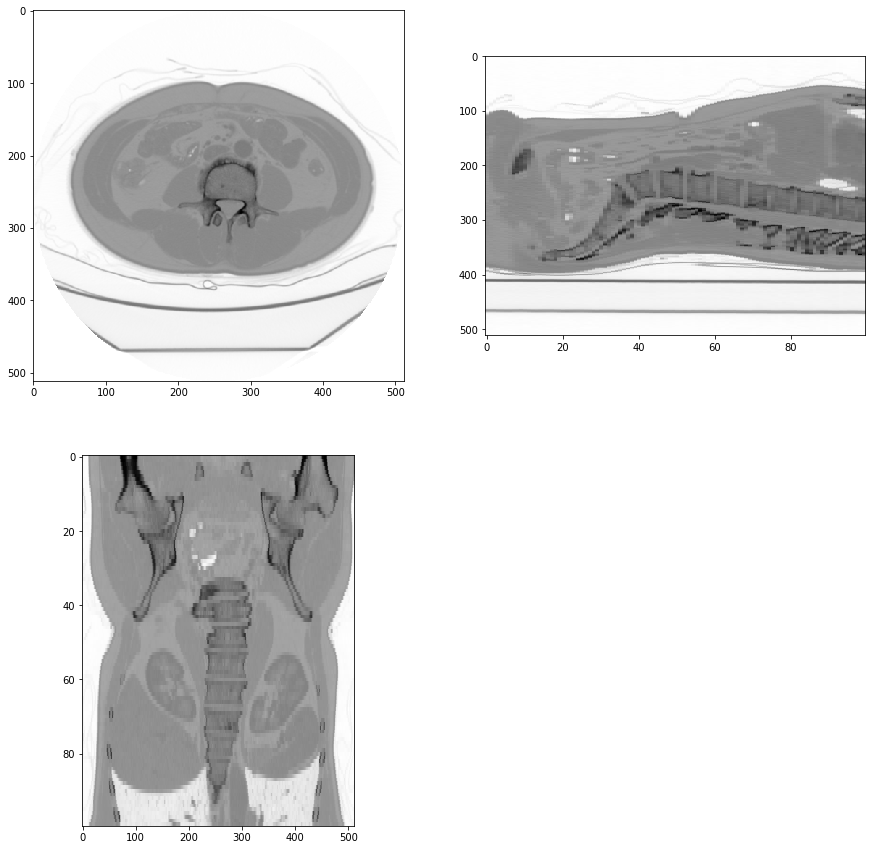

In [10]:
# plot 3 orthogonal slices

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2],cmap=plt.cm.binary)
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :],cmap=plt.cm.binary)
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T,cmap=plt.cm.binary)
a3.set_aspect(cor_aspect)

plt.rcParams["figure.figsize"] = (15,15)
plt.show()